<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [6]:
import pandas as pd
import numpy as np

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [10]:
data = pd.read_csv('Salaries.csv',index_col='playerID',header=0,skiprows=[1])
data.head(5)
#pd.read_csv('Salaries.csv',header=1)
#pd.read_csv('Salaries.csv',skiprows=2,header=None)

,yearID,teamID,lgID,salary
playerID,,,,
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000


In [11]:
data.shape

(25574, 4)

#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [14]:
players_with_salary_higher_than_1_mil =data[((data.teamID=='ATL')|(data.teamID=='HOU'))&(data.salary>1000000)]
print('The number of players from ATL and HOU with salary higher than one million are :',players_with_salary_higher_than_1_mil.shape[0])
print(players_with_salary_higher_than_1_mil)

The number of players from ATL and HOU with salary higher than one million are : 595
           yearID teamID lgID   salary
playerID                              
hornebo01    1985    ATL   NL  1500000
murphda05    1985    ATL   NL  1625000
suttebr01    1985    ATL   NL  1354167
ryanno01     1985    HOU   NL  1350000
hornebo01    1986    ATL   NL  1800000
...           ...    ...  ...      ...
quallch01    2015    HOU   AL  3000000
rasmuco01    2015    HOU   AL  8000000
singljo02    2015    HOU   AL  2000000
sippto01     2015    HOU   AL  2400000
valbulu01    2015    HOU   AL  4200000

[595 rows x 4 columns]


In [15]:
print("Indexing the playerIDs of all the players in ATL and HOU whose salary is higher that one mil : ",players_with_salary_higher_than_1_mil.index)

Indexing the playerIDs of all the players in ATL and HOU whose salary is higher that one mil :  Index(['hornebo01', 'murphda05', 'suttebr01', 'ryanno01', 'hornebo01',
       'murphda05', 'suttebr01', 'ryanno01', 'griffke01', 'murphda05',
       ...
       'feldmsc01', 'gonzama01', 'gregelu01', 'lowrije01', 'neshepa01',
       'quallch01', 'rasmuco01', 'singljo02', 'sippto01', 'valbulu01'],
      dtype='object', name='playerID', length=595)


#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [18]:
data = pd.read_csv('Salaries.csv',index_col='playerID')
data[data['teamID']=='ATL']['salary'].describe()

count    8.860000e+02
mean     2.206239e+06
std      3.432673e+06
min      6.000000e+04
25%      3.000000e+05
50%      6.000000e+05
75%      2.390625e+06
max      1.606180e+07
Name: salary, dtype: float64

#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [21]:
dict_ = {'playerID':[],'yearID':[], 'teamID':[],'lgID':[],'salary':[]}
for row in data.iterrows():
    dict_['playerID'].append(row[0])
    dict_['yearID'].append(row[1].yearID)
    dict_['teamID'].append(row[1].teamID) 
    dict_['lgID'].append(row[1].lgID)
    dict_['salary'].append(row[1].salary)
print(dict_)

{'playerID': ['barkele01', 'bedrost01', 'benedbr01', 'campri01', 'ceronri01', 'chambch01', 'dedmoje01', 'forstte01', 'garbege01', 'harpete01', 'hornebo01', 'hubbagl01', 'mahleri01', 'mcmurcr01', 'mumphje01', 'murphda05', 'oberkke01', 'perezpa01', 'perryge01', 'ramirra01', 'suttebr01', 'washicl01', 'boddimi01', 'dauerri01', 'davisst02', 'dempsri01', 'dwyerji01', 'flanami01', 'fordda01', 'grosswa01', 'lacyle01', 'lynnfr01', 'martide01', 'martiti01', 'mcgresc01', 'murraed02', 'nolanjo01', 'rayfofl01', 'ripkeca01', 'roeniga01', 'sheetla01', 'shelbjo01', 'stewasa01', 'youngmi01', 'armasto01', 'barrema02', 'boggswa01', 'bordiri01', 'boydoi01', 'bucknbi01', 'clearma01', 'clemero02', 'crawfst01', 'easlemi01', 'evansdw01', 'gedmari01', 'gutieja01', 'hoffmgl01', 'hurstbr01', 'juraked01', 'kisonbr01', 'milleri01', 'nichore01', 'nippeal01', 'ojedabo01', 'remyje01', 'riceji01', 'stanlbo01', 'staplda01', 'beniqju01', 'boonebo01', 'burleri01', 'candejo01', 'carewro01', 'clibust02', 'corbedo01', 'deci

In [22]:
data_ = pd.read_csv('Salaries.csv')
mydict = data_.to_dict('list')
print(mydict)

{'yearID': [1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985

#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [25]:
#data_dict = dict_
#new_df = pd.DataFrame.from_dict(data_dict,orient = 'columns')#,columns=['a','b','c','d','e'])
#new_df = pd.DataFrame(data=dict_)#,columns=['a','b','c','d'])
#new_df.head(3)

df= pd.DataFrame(data=dict_)
df.rename(columns={'playerID':'a','yearID':'b','teamID':'c','lgID':'d','salary':'e'},inplace=True)
df

,a,b,c,d,e
0,barkele01,1985,ATL,NL,870000
1,bedrost01,1985,ATL,NL,550000
2,benedbr01,1985,ATL,NL,545000
3,campri01,1985,ATL,NL,633333
4,ceronri01,1985,ATL,NL,625000
...,...,...,...,...,...
25570,treinbl01,2015,WAS,NL,512800
25571,ugglada01,2015,WAS,NL,507500
25572,werthja01,2015,WAS,NL,21000000
25573,zimmejo02,2015,WAS,NL,16500000


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [31]:
import numpy as np
list_ = [[1,2,3],[4,5,6]]
print(type(list_))
na = np.array(list_)
print(type(na))

<class 'list'>
<class 'numpy.ndarray'>


#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [34]:
print(na)
print('Dimensions : ',na.ndim)
print('Shape : ',na.shape)
print('Size : ',na.size)
print('Data type : ',na.dtype)
print('Itemsize : ',na.itemsize)
print('Data : ',na.data)

[[1 2 3]
 [4 5 6]]
Dimensions :  2
Shape :  (2, 3)
Size :  6
Data type :  int64
Itemsize :  8
Data :  <memory at 0x1377b9630>


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [37]:
print(na)
na_reshaped = np.reshape(na,(3,2))
print('Reshaped : ',na_reshaped)
na_1 = np.copy(na)
na_flatten = na_1.flatten()
na_flatten_fortran = na_1.flatten('F')
print('Flat',na_flatten)
print('Flat fortran',na_flatten_fortran)


[[1 2 3]
 [4 5 6]]
Reshaped :  [[1 2]
 [3 4]
 [5 6]]
Flat [1 2 3 4 5 6]
Flat fortran [1 4 2 5 3 6]


#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [40]:
sample = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
sample

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [41]:
sample[2]


array([7, 8, 9])

In [42]:
sample[1:3]

array([[4, 5, 6],
       [7, 8, 9]])

In [43]:
sample[0:3:2] = 529
sample

array([[529, 529, 529],
       [  4,   5,   6],
       [529, 529, 529],
       [ 10,  11,  12]])

In [44]:
y = np.arange(10)**3
y

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [45]:
y[0:8:2]= 678
y

array([678,   1, 678,  27, 678, 125, 678, 343, 512, 729])

In [46]:
#reversing y 
y[::-1]

array([729, 512, 343, 678, 125, 678,  27, 678,   1, 678])

In [47]:
#reversing sample 
sample[::-1]

array([[ 10,  11,  12],
       [529, 529, 529],
       [  4,   5,   6],
       [529, 529, 529]])

In [48]:
print(sample)
sample[3,1]

[[529 529 529]
 [  4   5   6]
 [529 529 529]
 [ 10  11  12]]


11

In [49]:
sample[-1]

array([10, 11, 12])

#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [52]:
x = np.arange(10)
x


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
y2 = np.array([10, 20, 30, 40, 50])
x_y2 = np.array([2, 4, 6, 8, 10])  # Matching the length of `y`


In [54]:
np.argmin(sample)
print('Array y :',y)
print('\nArgmin : ',np.argmin(y))
print('\nArgmax : ',np.argmax(y))
print('\nMin : ',np.min(y))
print('\nMax : ',np.max(y))
print('\nMean : ',np.mean(y))
print('\nSum : ',np.sum(y))
print('\nStd : ',np.std(y))
print('\nDot : ',np.dot(y,x))
print('\nSquare : ',np.square(y))
print('\nSqrt : ',np.sqrt(y))
print('\nabs : ',np.abs(y))
print('\nEXP : ',np.exp(x))
print('\nSign : ',np.sign(y))
print()
print('Mod : ',np.mod(y2,x_y2))

Array y : [678   1 678  27 678 125 678 343 512 729]

Argmin :  1

Argmax :  9

Min :  1

Max :  729

Mean :  444.9

Sum :  4449

Std :  280.52894681298045

Dot :  21901

Square :  [459684      1 459684    729 459684  15625 459684 117649 262144 531441]

Sqrt :  [26.03843313  1.         26.03843313  5.19615242 26.03843313 11.18033989
 26.03843313 18.52025918 22.627417   27.        ]

abs :  [678   1 678  27 678 125 678 343 512 729]

EXP :  [1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]

Sign :  [1 1 1 1 1 1 1 1 1 1]

Mod :  [0 0 0 0 0]


#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [57]:
print('Arange :', np.arange(2, 20,2))
print('\nOne :', np.ones((8)))
print('\nOne_fortran : ',np.ones((2,8),order='F'))
print('\nZeros :',np.zeros(5))
print('\nZeros_int :',np.zeros(8,dtype=int))
print('\nEye :',np.eye(5,dtype=int))  ##Return a 2-D array with ones on the diagonal and zeros elsewhere.
print('\nLinespace :',np.linspace(2,30,10,dtype=float))
print('\nLinespace :',np.linspace(2,80,18))
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
print()
print(b)
print()
print(b.T)
print('\nConcatenate_row:',np.concatenate((a,b),axis=0))
print('\nConcatenate_col:',np.concatenate((a,b.T),axis=1))

Arange : [ 2  4  6  8 10 12 14 16 18]

One : [1. 1. 1. 1. 1. 1. 1. 1.]

One_fortran :  [[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]

Zeros : [0. 0. 0. 0. 0.]

Zeros_int : [0 0 0 0 0 0 0 0]

Eye : [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]

Linespace : [ 2.          5.11111111  8.22222222 11.33333333 14.44444444 17.55555556
 20.66666667 23.77777778 26.88888889 30.        ]

Linespace : [ 2.          6.58823529 11.17647059 15.76470588 20.35294118 24.94117647
 29.52941176 34.11764706 38.70588235 43.29411765 47.88235294 52.47058824
 57.05882353 61.64705882 66.23529412 70.82352941 75.41176471 80.        ]

[[5 6]]

[[5]
 [6]]

Concatenate_row: [[1 2]
 [3 4]
 [5 6]]

Concatenate_col: [[1 2 5]
 [3 4 6]]


### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

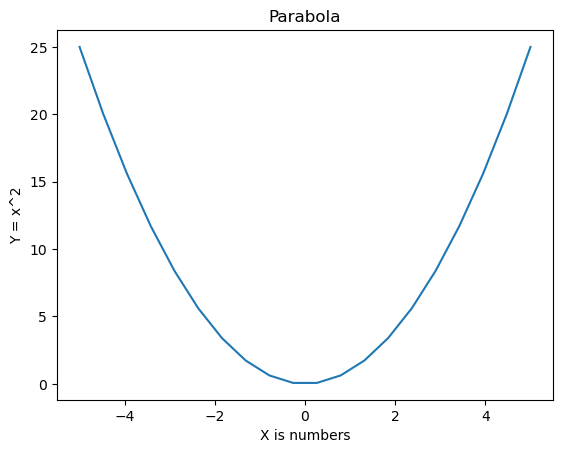

In [63]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.plot(x,y)
plt.title('Parabola')
plt.xlabel('X is numbers')
plt.ylabel('Y = x^2')
plt.show()


What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])

```

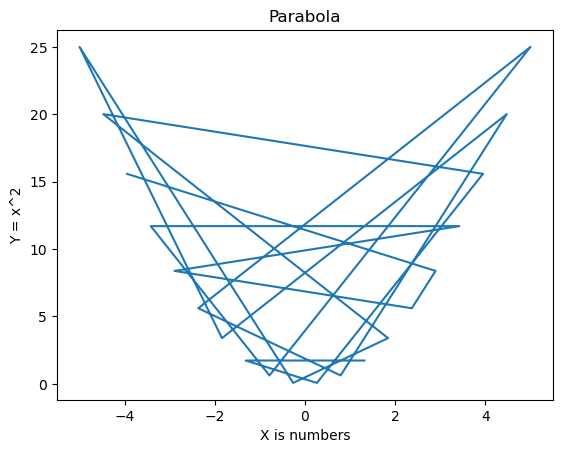

In [65]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])

plt.plot(x,y)
plt.title('Parabola')
plt.xlabel('X is numbers')
plt.ylabel('Y = x^2')
plt.show()


(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

In [67]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])




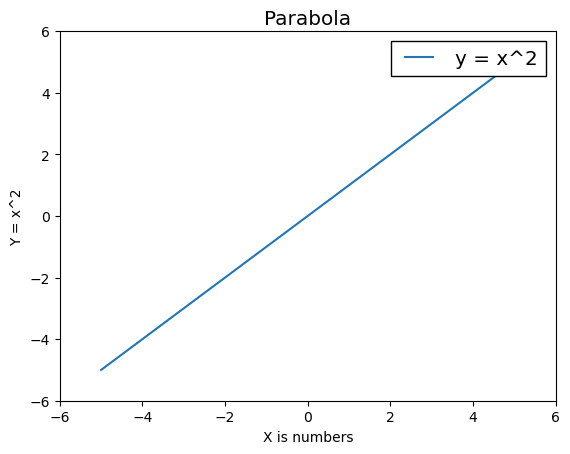

In [68]:
plt.plot(x, y1, label='y = x^2')
plt.style.use('classic')
plt.title('Parabola')
plt.xlabel('X is numbers')
plt.ylabel('Y = x^2')
plt.legend()
plt.show()




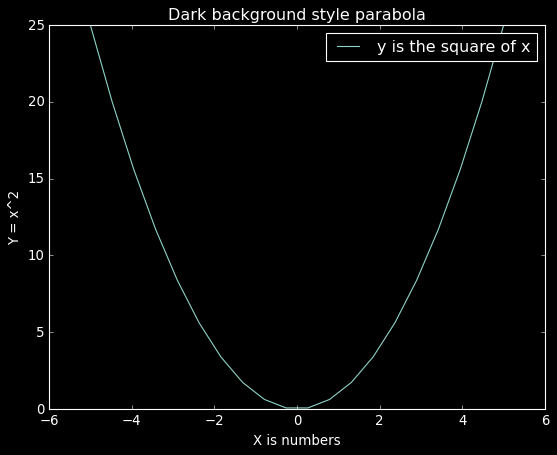

In [69]:
with plt.style.context('dark_background'):
    plt.plot(x,y2, label='y is the square of x')
    plt.title('Dark background style parabola')
    plt.xlabel('X is numbers')
    plt.ylabel('Y = x^2')
    plt.legend()
    plt.show()




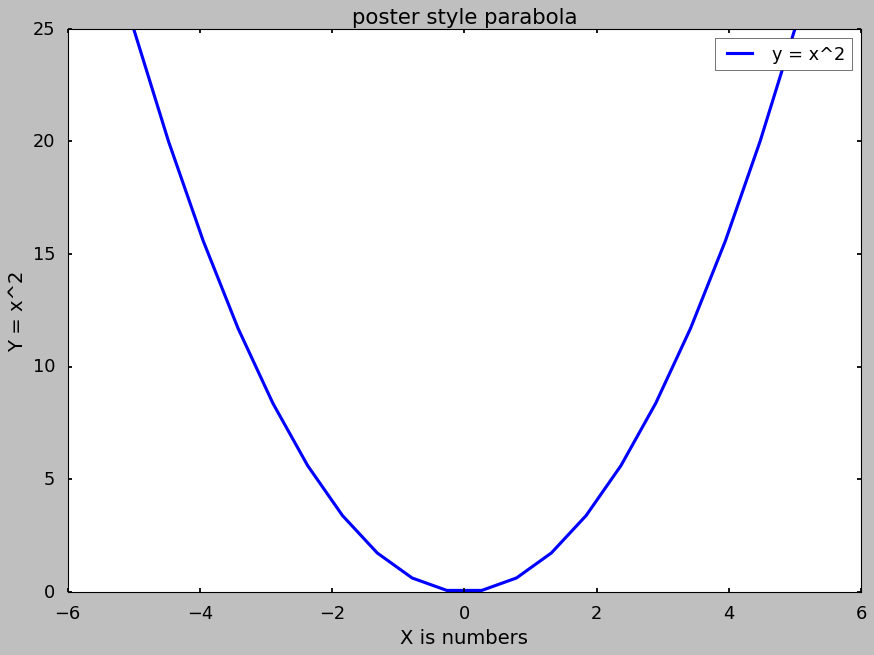

In [70]:
'''with plt.style.context('seaborn-v0_8-poster'):
    plt.plot(x,y3, label='y = x^2')
    plt.title('Seaborn poster style parabola')
    plt.xlabel('X is numbers')
    plt.ylabel('Y = x^2')
    plt.legend()
    plt.show()'''

with plt.style.context('seaborn-v0_8-poster'):
    plt.plot(x,y2, label='y = x^2')
    plt.title('poster style parabola')
    plt.xlabel('X is numbers')
    plt.ylabel('Y = x^2')
    plt.legend()
    plt.show()





(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

In [72]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

print(x)
print(y1)

[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]


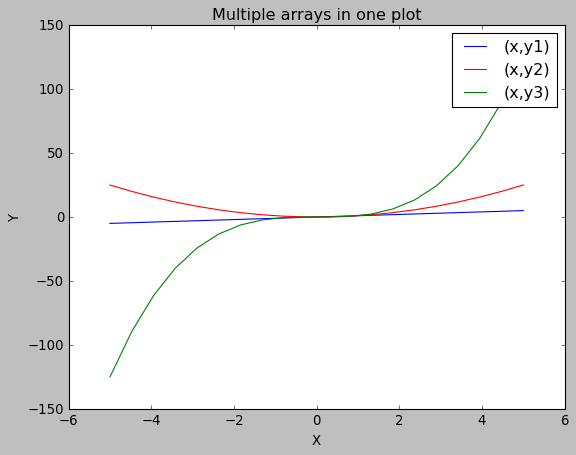

In [73]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

#creating a single figure
plt.figure()

#plotting all three arrays on one plot

plt.style.use('classic')
plt.plot(x,y1,label='(x,y1)',color='blue')
plt.plot(x,y2,label='(x,y2)',color='red')
plt.plot(x,y3,label='(x,y3)',color='green')
plt.title("Multiple arrays in one plot")
plt.xlabel("X")
plt.ylabel("Y")

plt.legend()
plt.show()

(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

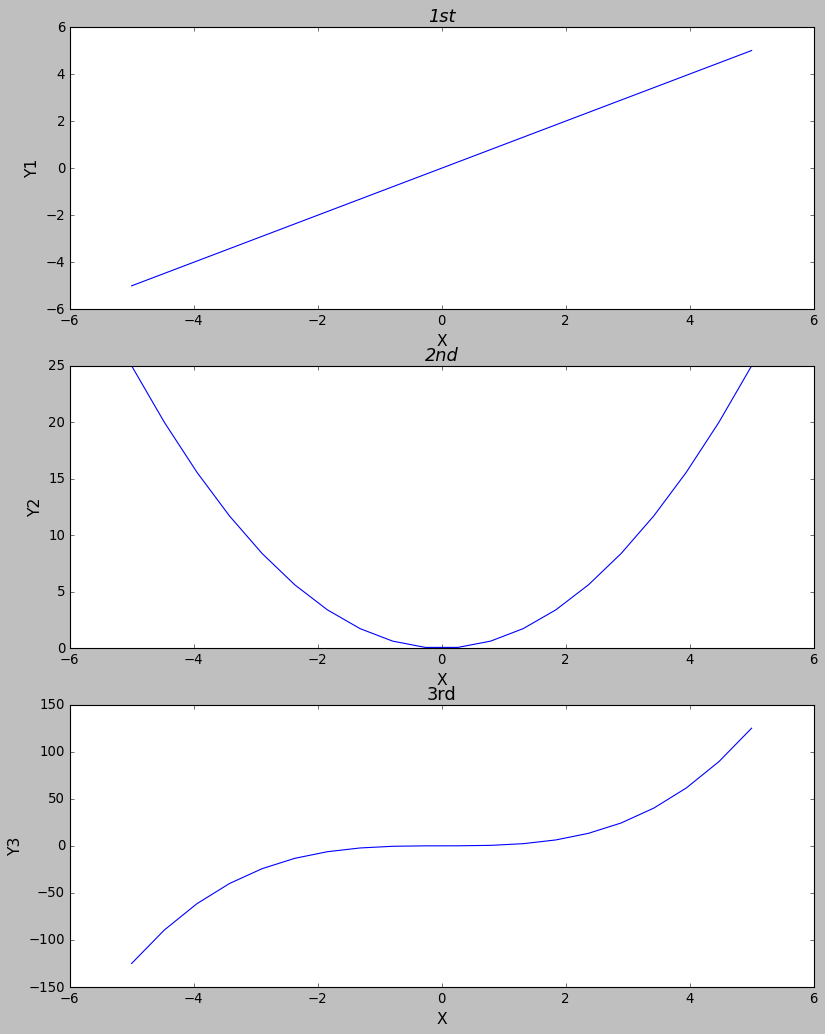

In [75]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.style.use('classic')
fig, axs = plt.subplots(3,figsize=(12,15))
axs[0].plot(x, y1)
axs[0].set_title('1st', fontsize=16, fontstyle='italic')
axs[0].set_xlabel('X', fontsize=14)
axs[0].set_ylabel('Y1', fontsize=14)

axs[1].plot(x, y2)
axs[1].set_title('2nd', fontsize=16, fontstyle='oblique')
axs[1].set_xlabel('X', fontsize=14)
axs[1].set_ylabel('Y2', fontsize=14)

axs[2].plot(x,y3)
axs[2].set_title('3rd', fontsize=16, fontstyle='normal')
axs[2].set_xlabel('X', fontsize=14)
axs[2].set_ylabel('Y3', fontsize=14)

plt.show()

(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

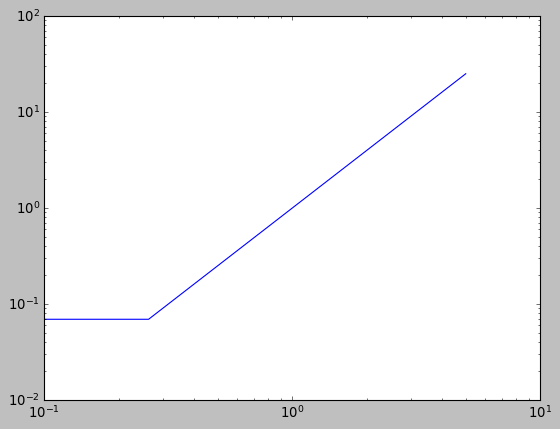

In [77]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
plt.style.use('classic')
plt.plot(x,y)
plt.yscale("log")
plt.xscale("log")
plt.show()

### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

In [81]:
data = pd.read_csv('Salaries.csv')
data.head(5)
data_ATL = data[data['teamID']=='ATL']
#data_ATL.drop('playerID', axis=1)
print(data.head(5))
print()
print(data_ATL)
#data_year =data_ATL.yearID

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000

       yearID teamID lgID   playerID   salary
0        1985    ATL   NL  barkele01   870000
1        1985    ATL   NL  bedrost01   550000
2        1985    ATL   NL  benedbr01   545000
3        1985    ATL   NL   campri01   633333
4        1985    ATL   NL  ceronri01   625000
...       ...    ...  ...        ...      ...
24806    2015    ATL   NL  simmoan01  3000000
24807    2015    ATL   NL  teherju01  1000000
24808    2015    ATL   NL  terdojo01   507500
24809    2015    ATL   NL   woodal02   520000
24810    2015    ATL   NL  younger03  1000000

[886 rows x 5 columns]


In [82]:
year =data_ATL['yearID']
year.head(10)
#data_salary = data_ATL.salary

0    1985
1    1985
2    1985
3    1985
4    1985
5    1985
6    1985
7    1985
8    1985
9    1985
Name: yearID, dtype: int64

In [83]:
sal=data_ATL['salary']
sal.head(4)

0    870000
1    550000
2    545000
3    633333
Name: salary, dtype: int64

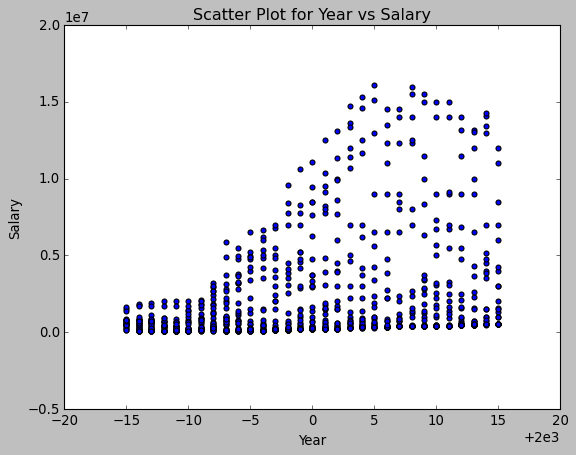

In [84]:
## scatter plot
plt.style.use('classic')
plt.scatter(year,sal)

plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Scatter Plot for Year vs Salary')

plt.show()

(b) For year 1985, plot a bar chart to show the average salary for each team.

In [86]:
data_1985=data[data['yearID']==1985]
data_1985.tail(5)


,yearID,teamID,lgID,playerID,salary
545,1985,TOR,AL,mosebll01,587500
546,1985,TOR,AL,mullira01,325000
547,1985,TOR,AL,stiebda01,1000000
548,1985,TOR,AL,upshawi01,730000
549,1985,TOR,AL,whitter01,370000


In [87]:
### average salary for each team

average_salary = data_1985.groupby('teamID')['salary'].mean()
average_salary


teamID
ATL    673045.454545
BAL    525486.909091
BOS    435902.400000
CAL    515281.928571
CHA    468865.619048
CHN    577405.318182
CIN    379996.227273
CLE    327583.300000
DET    517407.150000
HOU    499652.550000
KCA    423689.954545
LAN    476865.956522
MIN    303411.631579
ML4    593900.368421
MON    473508.300000
NYA    711910.200000
NYN    515941.047619
OAK    431362.190476
PHI    532892.947368
PIT    485657.894737
SDN    501662.863636
SEA    256277.777778
SFN    411085.700000
SLN    472683.320000
TEX    383825.000000
TOR    440627.500000
Name: salary, dtype: float64

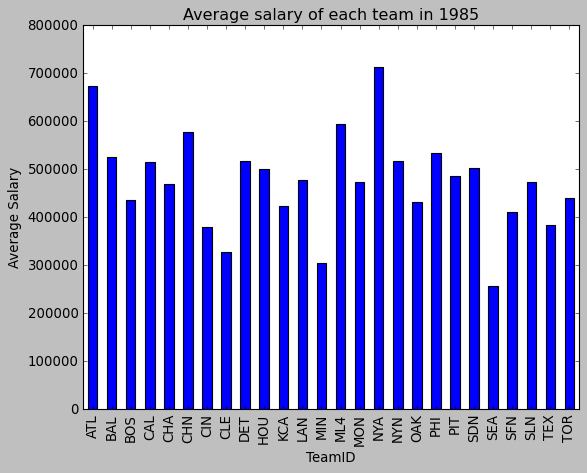

In [88]:
### bar chart 
plt.style.use('classic')
average_salary.plot(kind='bar')
plt.title('Average salary of each team in 1985')
plt.xlabel('TeamID')
plt.ylabel('Average Salary')

plt.show()

(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

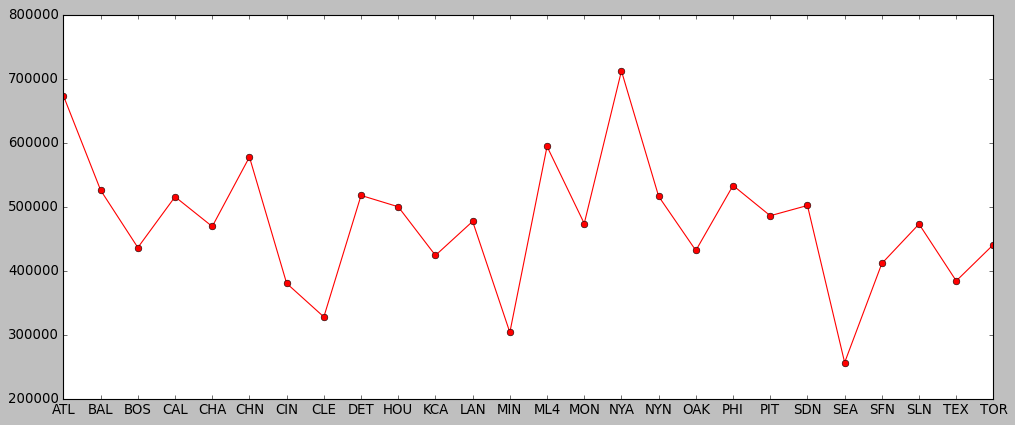

In [90]:
### line plot
plt.style.use('classic')
plt.figure(figsize=(15, 6))
plt.plot(average_salary,marker='o',color='red')


#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

In [93]:
data.head()
data.shape
total_goals_each_year = np.random.randint(0,80,25575)
print(total_goals_each_year)



[25 68 30 ... 77 17 39]


In [94]:
data['goalsID'] = total_goals_each_year
data.head()

,yearID,teamID,lgID,playerID,salary,goalsID
0,1985,ATL,NL,barkele01,870000,25
1,1985,ATL,NL,bedrost01,550000,68
2,1985,ATL,NL,benedbr01,545000,30
3,1985,ATL,NL,campri01,633333,72
4,1985,ATL,NL,ceronri01,625000,18


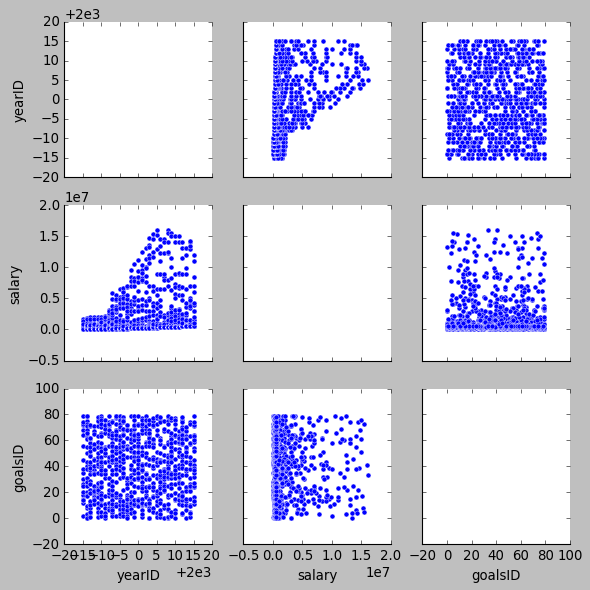

In [95]:
import seaborn as sns
data_ATL_ = data[data['teamID'] == 'ATL']
plt.style.use('classic')
sns.pairplot(data_ATL_, vars=['yearID', 'salary', 'goalsID'], diag_kind='scatter')
plt.show()

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

<Axes: xlabel='teamID', ylabel='salary'>

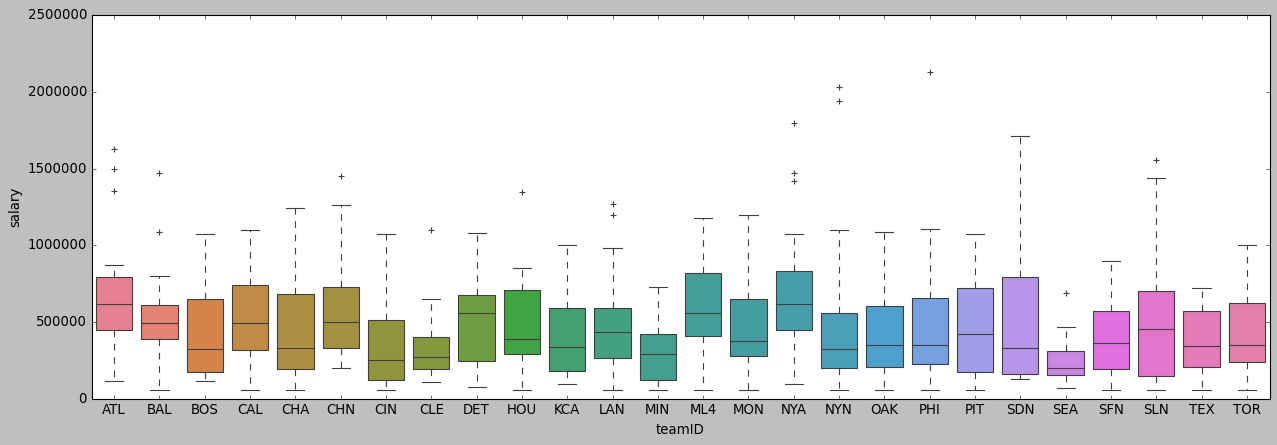

In [97]:
data_1985.head()
plt.style.use('classic')
plt.figure(figsize=(19,6))
sns.boxplot(data=data_1985, x='teamID', y='salary',hue="teamID")


(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.